In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
exp1_sessions = pd.read_csv('../data/exp1/sessions.csv', index_col=0)
exp1_pilots = pd.read_csv('../data/exp1/pilots.csv', index_col=0)
exp1_units = pd.read_csv('../data/exp1/units.csv', index_col=0)

exp2_sessions = pd.read_csv('../data/exp2/sessions.csv', index_col=0)
exp2_pilots = pd.read_csv('../data/exp2/pilots.csv', index_col=0)
exp2_units = pd.read_csv('../data/exp2/units.csv', index_col=0)

In [3]:
print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp1_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp1_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp1_units.shape[0]

print 'Experiment 2: Baseline: Total number of successful runs: %s' % exp2_sessions.shape[0]
print 'Experiment 2: Baseline: Total number of pilots: %s' % exp2_pilots.shape[0]
print 'Experiment 2: Baseline: Total number of units: %s\n' % exp2_units.shape[0]

Experiment 1: Baseline: Total number of successful runs: 18
Experiment 1: Baseline: Total number of pilots: 23
Experiment 1: Baseline: Total number of units: 5257

Experiment 2: Baseline: Total number of successful runs: 12
Experiment 2: Baseline: Total number of pilots: 12
Experiment 2: Baseline: Total number of units: 4095



In [4]:
exp1_ws = exp1_sessions[ 
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC',
     'U_AGENT_EXECUTING','cu_exec_start_stop']
        ][exp1_sessions.sid != 'rp.session.login1.mturilli1.018092.0008'].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std']})

exp1_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp1_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp1_ws

TTQ             Agent queueing           Agent queueing execution             TTX Agent                     TTC                Agent scheduling              TTX Unit          
              mean         std           mean       std                     mean       std        mean       std          mean            std             mean       std        mean       std
nunit                                                                                                                                                                                         
1        59.459004   42.339110       0.000788  0.000076                 0.000792  0.000037  900.610458  0.160406  1.562854e+09    5136.458185         0.003607  0.000579  900.547132  0.186629
2        42.557972   12.833052       0.000911  0.000041                 0.007444  0.000146  900.696172  0.428455  1.564014e+09  695273.555382         0.003448  0.000320  900.619918  0.454588
4        30.429255         NaN       0.001372       NaN                 0.024205       NaN  900.492072       NaN  1.563195e+09            NaN         0.007090       NaN  900.389348       NaN
8        47.211977         NaN       0.002914       NaN                 0.062235       NaN  900.466244       NaN  1.563196e+09            NaN         0.014082       NaN  900.433274       NaN
16       33.391948         NaN       0.004387       NaN                 0.194160       NaN  900.717472       NaN  1.563197e+09            NaN         0.026917       NaN  900.626799       NaN
32       37.923349         NaN       0.005584       NaN                 0.458931       NaN  901.827273       NaN  1.563199e+09            NaN         0.052426       NaN  901.763319       NaN
64       53.687704   31.287596       0.011727  0.000096                 1.035330  0.068996  901.396330  0.095494  1.563646e+09  234648.595533         0.106535  0.002742  901.308607  0.052904
128      34.553981         NaN       0.021230       NaN                 1.957152       NaN  902.494472       NaN  1.563880e+09            NaN         0.264107       NaN  902.379124       NaN
256      28.945058         NaN       0.040746       NaN                 4.179775       NaN  904.649230       NaN  1.563900e+09            NaN         0.726284       NaN  904.551678       NaN
512      36.617219         NaN       0.080974       NaN                 8.714729       NaN  909.036088       NaN  1.563901e+09            NaN         1.576717       NaN  908.975647       NaN
1024    617.458293  613.676073       0.155643  0.000663                16.287116  0.094822  936.441911  0.060744  1.563908e+09    7266.035433         4.112562  0.269654  936.334963  0.059782
2048   8407.614673         NaN       0.309896       NaN                22.921988       NaN  938.027450       NaN  1.564049e+09            NaN        17.960864       NaN  937.965466       NaN

In [5]:
exp2_ws = exp2_sessions[ 
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC',
     'U_AGENT_EXECUTING','cu_exec_start_stop']
        ][exp2_sessions.sid != 'rp.session.login1.mturilli1.018092.0008'].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std']})

exp2_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp2_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp2_ws

TTQ     Agent queueing     Agent queueing execution       TTX Agent               TTC     Agent scheduling        TTX Unit    
              mean std           mean std                     mean std        mean std          mean std             mean std        mean std
nunit                                                                                                                                        
1        55.466451 NaN       0.000792 NaN                 0.000713 NaN  900.473568 NaN  1.564437e+09 NaN         0.002018 NaN  900.277073 NaN
2        38.150969 NaN       0.000896 NaN                 0.114962 NaN  900.333110 NaN  1.564471e+09 NaN         0.004236 NaN  900.183359 NaN
4        34.450524 NaN       0.001266 NaN                 0.324057 NaN  900.569095 NaN  1.564476e+09 NaN         0.008405 NaN  900.401383 NaN
8      1098.465558 NaN       0.003297 NaN                 0.763073 NaN  901.054057 NaN  1.564477e+09 NaN         0.018266 NaN  900.838583 NaN
16       44.251749 NaN       0.003108 NaN                 1.671296 NaN  901.907145 NaN  1.564483e+09 NaN         0.034553 NaN  901.748708 NaN
32      538.333388 NaN       0.005856 NaN                 3.431831 NaN  903.674174 NaN  1.564493e+09 NaN         0.066406 NaN  903.509923 NaN
64       35.935749 NaN       0.011952 NaN                 7.004765 NaN  907.297967 NaN  1.564497e+09 NaN         0.131854 NaN  907.078475 NaN
128      64.252916 NaN       0.022195 NaN                14.131270 NaN  914.355612 NaN  1.564499e+09 NaN         0.267136 NaN  914.208787 NaN
256      44.761479 NaN       0.041217 NaN                28.561321 NaN  928.793688 NaN  1.564504e+09 NaN         0.558210 NaN  928.646745 NaN
512    4310.148417 NaN       0.091088 NaN                58.106743 NaN  958.400457 NaN  1.564509e+09 NaN         1.306691 NaN  958.202285 NaN
1024   1452.806319 NaN       0.156533 NaN               117.245590 NaN  988.014547 NaN  1.564515e+09 NaN         2.758131 NaN  987.792399 NaN
2048    110.008499 NaN       0.392297 NaN               229.555135 NaN  989.327011 NaN  1.564519e+09 NaN        92.188518 NaN  989.157247 NaN

In [6]:
oh1 = exp1_ws[['TTX Agent','TTX Unit']].copy(deep=True)
oh1.loc[:,('TTX Agent','mean')] = oh1.loc[:,('TTX Agent','mean')] - oh1.loc[:,('TTX Unit','mean')]
oh1.loc[:,('TTX Unit','mean')] = oh1.loc[:,('TTX Unit','mean')] - 900

oh1.rename({'TTX Agent': 'RP Overhead with JSRUN'}, axis='columns', inplace=True)
oh1.rename({'TTX Unit' : 'JSRUN Overhead'}, axis='columns', inplace=True)

oh1 = oh1.reset_index()
oh1.columns = [' '.join(col).strip() for col in oh1.columns.values]

In [7]:
oh2 = exp2_ws[['TTX Agent','TTX Unit']].copy(deep=True)
oh2.loc[:,('TTX Agent','mean')] = oh2.loc[:,('TTX Agent','mean')] - oh2.loc[:,('TTX Unit','mean')]
oh2.loc[:,('TTX Unit','mean')] = oh2.loc[:,('TTX Unit','mean')] - 900

oh2.rename({'TTX Agent': 'RP Overhead with PRRTE'}, axis='columns', inplace=True)
oh2.rename({'TTX Unit' : 'PRRTE Overhead'}, axis='columns', inplace=True)

oh2 = oh2.reset_index()
oh2.columns = [' '.join(col).strip() for col in oh2.columns.values]

In [8]:
oh = oh1.join(oh2[['RP Overhead with PRRTE mean',
                   'RP Overhead with PRRTE std',
                   'PRRTE Overhead mean',
                   'PRRTE Overhead std']])
oh

,nunit,RP Overhead with JSRUN mean,RP Overhead with JSRUN std,JSRUN Overhead mean,JSRUN Overhead std,RP Overhead with PRRTE mean,RP Overhead with PRRTE std,PRRTE Overhead mean,PRRTE Overhead std
0,1,0.063326,0.160406,0.547132,0.186629,0.196495,NaN,0.277073,NaN
1,2,0.076254,0.428455,0.619918,0.454588,0.149751,NaN,0.183359,NaN
2,4,0.102724,NaN,0.389348,NaN,0.167712,NaN,0.401383,NaN
3,8,0.032970,NaN,0.433274,NaN,0.215474,NaN,0.838583,NaN
4,16,0.090673,NaN,0.626799,NaN,0.158437,NaN,1.748708,NaN
5,32,0.063954,NaN,1.763319,NaN,0.164251,NaN,3.509923,NaN
6,64,0.087722,0.095494,1.308607,0.052904,0.219492,NaN,7.078475,NaN
7,128,0.115348,NaN,2.379124,NaN,0.146825,NaN,14.208787,NaN
8,256,0.097552,NaN,4.551678,NaN,0.146943,NaN,28.646745,NaN
9,512,0.060441,NaN,8.975647,NaN,0.198172,NaN,58.202285,NaN


/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


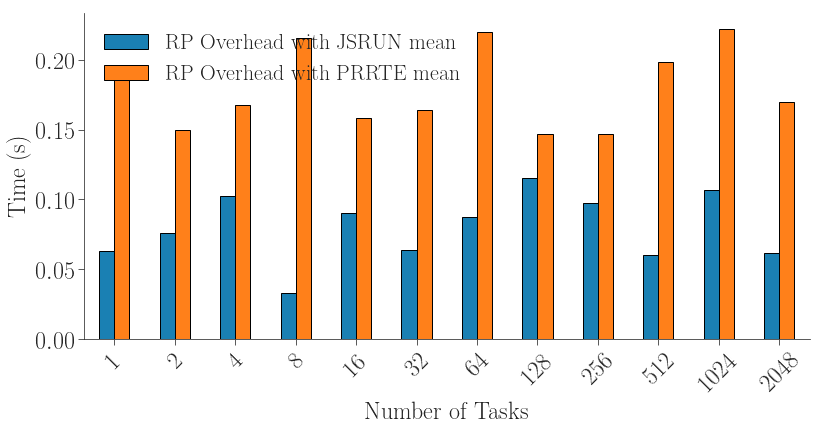

In [9]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh.plot.bar(
    x='nunit', 
    y   = ['RP Overhead with JSRUN mean','RP Overhead with PRRTE mean'], 
    # yerr= ['RP Overhead with JSRUN std' ,'RP Overhead with PRRTE std'],
    width=0.5, color=[tableau20[0], tableau20[2]], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks')
ax.set_ylabel('Time (s)')
# ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.png')

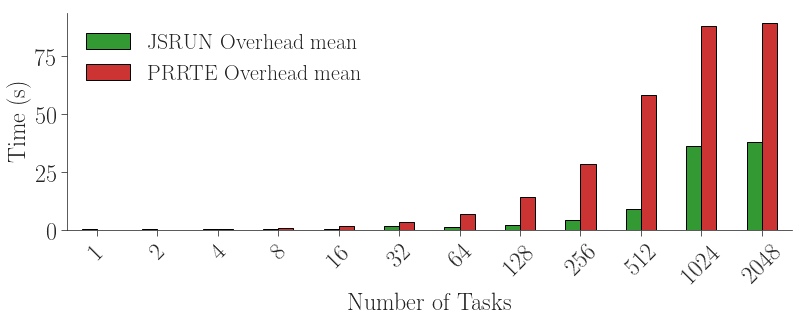

In [10]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh.plot.bar(
    x='nunit', 
    y=['JSRUN Overhead mean','PRRTE Overhead mean'], 
    # yerr=['JSRUN Overhead std','PRRTE Overhead std'],
    width=0.5, color=[tableau20[4],tableau20[6]], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.png')

In [11]:
# cu_exec_start
# cu_exec_stop